In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('avocado.csv')  # read the data
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(18249, 14)
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year   

In [4]:
#first drop Unnamed: 0 column then remove duplicates & recheck the size
data=data.drop(columns=["Unnamed: 0"],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(18249, 13)


In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Denver
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [6]:
print(data['year'].value_counts())

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


In [7]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

#as we seprated the day month & year we delete date column
data=data.drop(columns=["Date"],axis=1)
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1,7


In [8]:
# finding the how much type of avocoda is sell in a year 
print(data.groupby("year")['type'].value_counts())

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64


In [9]:
# Lets frist covert categorical data(type & column) into int 

label = LabelEncoder()
df=label.fit_transform(data["type"]) 
pd.Series(df)
data["type"]=df

In [10]:
data1=data.drop(columns='region')

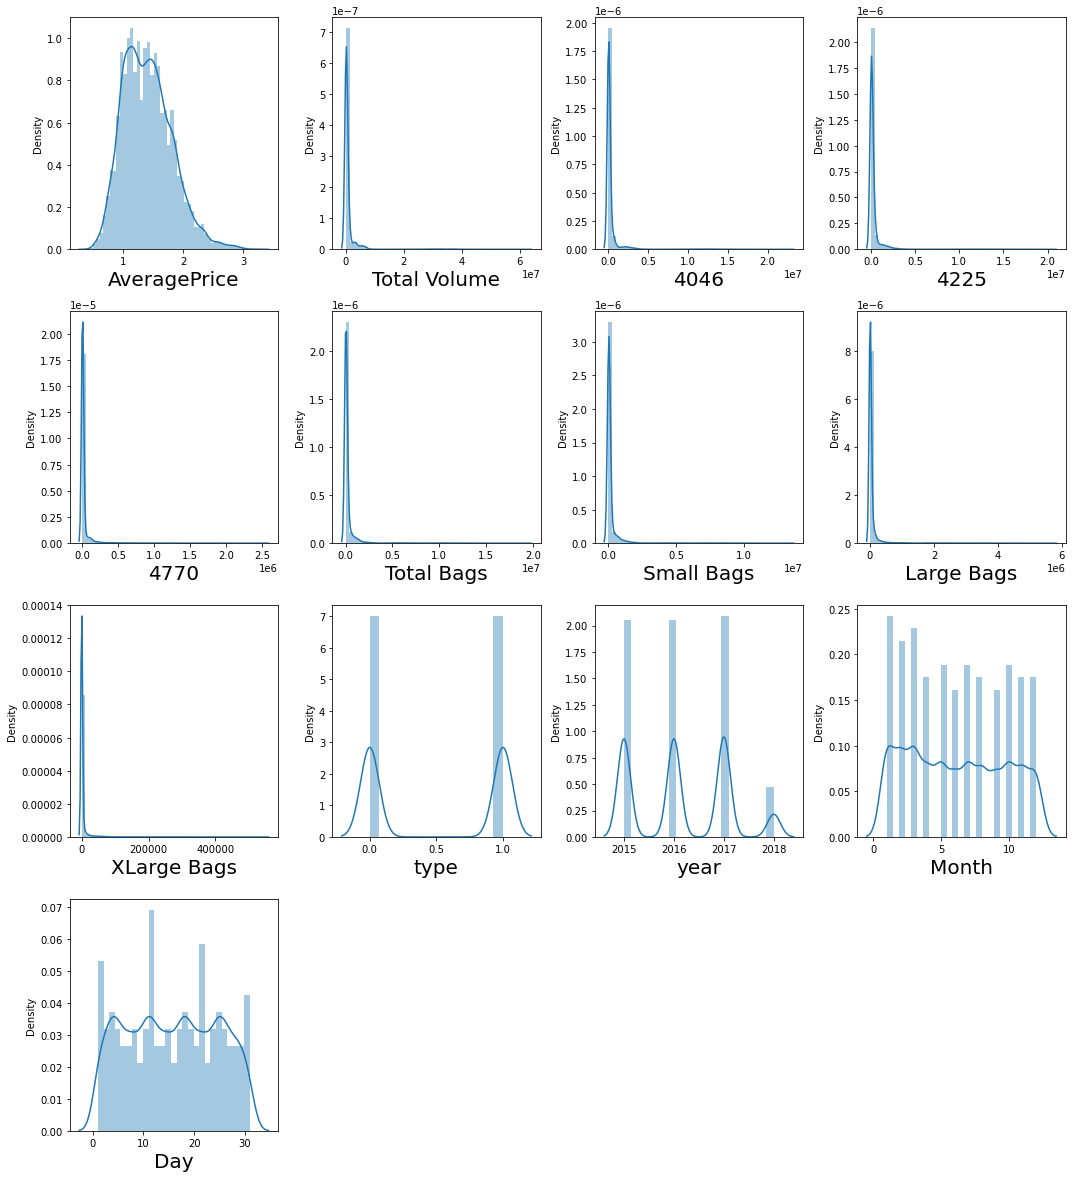

In [11]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
from sklearn.preprocessing import PowerTransformer

fetures=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [13]:
data[fetures]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849
...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849


In [14]:
data.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,Albany,12,27
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,Albany,12,20
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,2015,Albany,12,13


In [15]:
data1=data.drop(columns='region')
data1.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,2015,12,27
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,2015,12,20


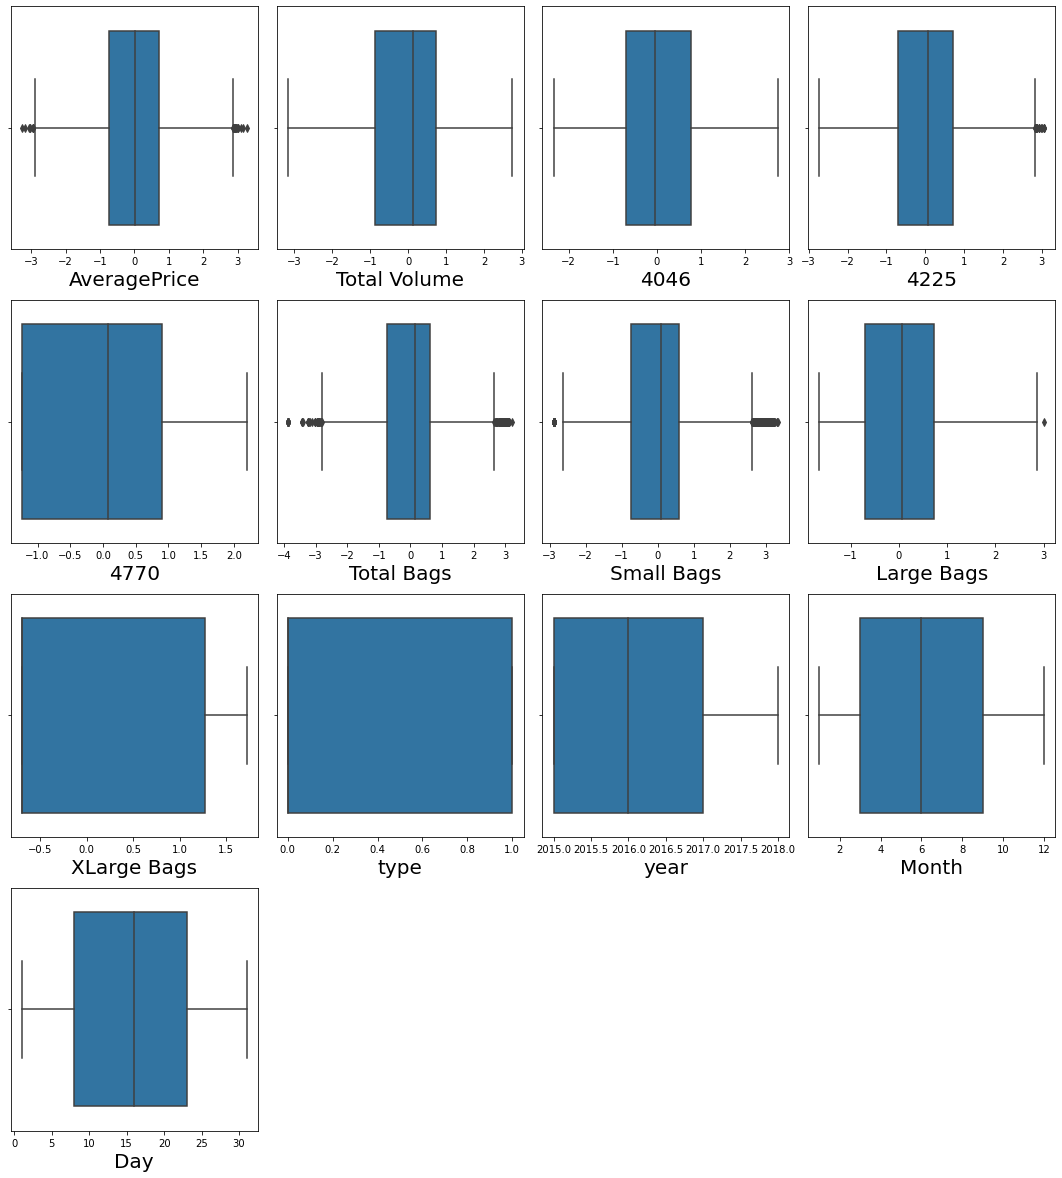

In [16]:
# distribusion after transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [17]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data1)
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data1=data1[filtering_entry]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,3,4,5,6,7,8,9,10,11,12
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1,...,0,0,0,0,0,0,0,0,0,0
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,...,0,0,0,0,0,0,0,0,0,0


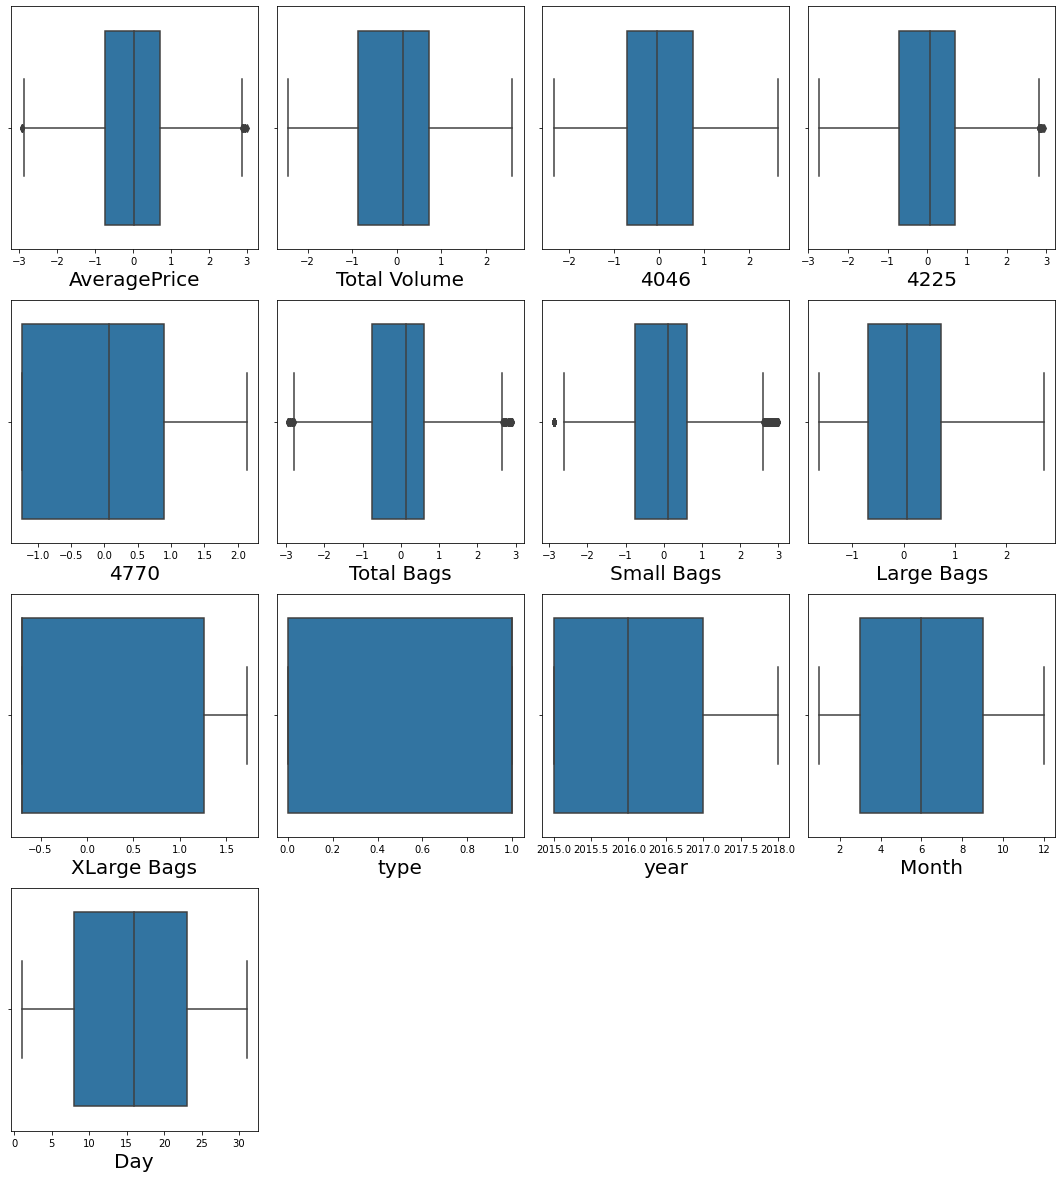

In [18]:
# Distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [19]:
data1.shape # after removing outliers

(18141, 13)

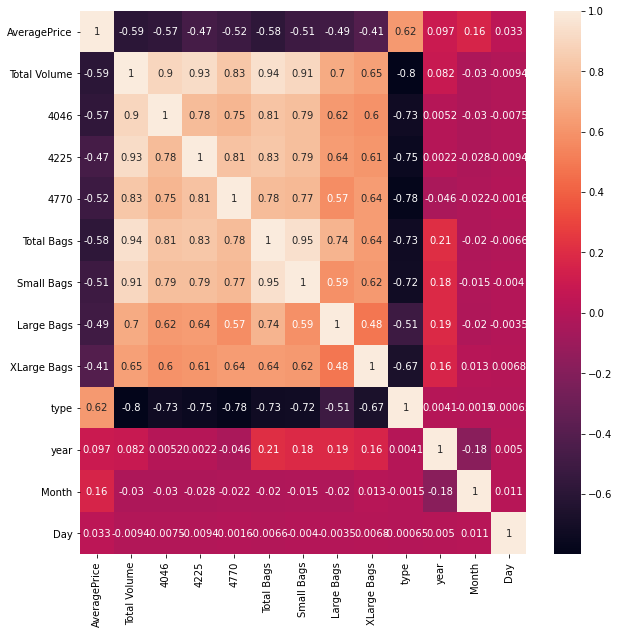

In [20]:
# Now data looks great lets check multicolinearity
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [21]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data1.drop(columns=['AveragePrice'])
y=data1['AveragePrice']

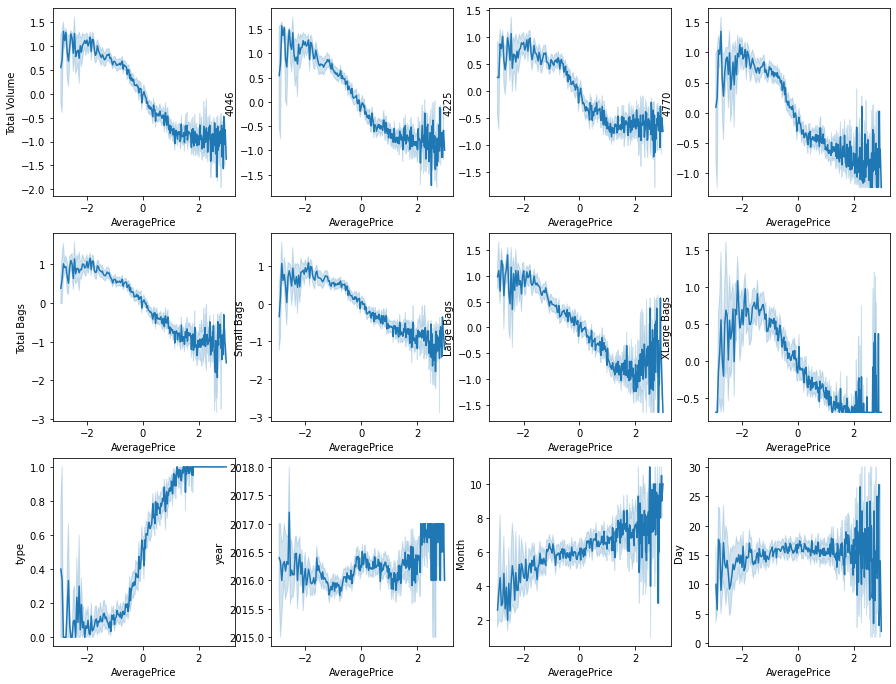

In [22]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [23]:
#Frist convert object type data into int by GetDummies encoding tech.for region & month
df=pd.get_dummies(data["region"],drop_first=True)
df.head()

,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,Columbus,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data1=data1.join(df)
data1.shape

(18141, 66)

In [25]:
df=pd.get_dummies(data["Month"],drop_first=True)
df.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0


In [26]:
data1=data1.join(df)
data1.shape

(18141, 77)

In [48]:
data1.columns

Index([       'AveragePrice',        'Total Volume',                '4046',
                      '4225',                '4770',          'Total Bags',
                'Small Bags',          'Large Bags',         'XLarge Bags',
                      'type',                'year',               'Month',
                       'Day',             'Atlanta', 'BaltimoreWashington',
                     'Boise',              'Boston',    'BuffaloRochester',
                'California',           'Charlotte',             'Chicago',
          'CincinnatiDayton',            'Columbus',       'DallasFtWorth',
                    'Denver',             'Detroit',         'GrandRapids',
                'GreatLakes',  'HarrisburgScranton', 'HartfordSpringfield',
                   'Houston',        'Indianapolis',        'Jacksonville',
                  'LasVegas',          'LosAngeles',          'Louisville',
         'MiamiFtLauderdale',            'Midsouth',           'Nashville',
          'N

In [28]:
x=data1.drop(columns=['AveragePrice','Month'])
y=data1['AveragePrice']

In [29]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled

array([[-0.07965399, -0.65640948,  0.32048989, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       [-0.14954635, -0.77581907,  0.24389593, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       [ 0.18916999, -0.7304558 ,  0.59602006, ..., -0.3011032 ,
        -0.28940715,  3.45935245],
       ...,
       [-0.7720027 , -0.61724153, -0.77256849, ..., -0.3011032 ,
        -0.28940715, -0.28907144],
       [-0.69777597, -0.54701063, -0.7098553 , ..., -0.3011032 ,
        -0.28940715, -0.28907144],
       [-0.66313547, -0.36284934, -0.78540091, ..., -0.3011032 ,
        -0.28940715, -0.28907144]])

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
vif

,vif,featurs
0,77.084022,Total Volume
1,17.175919,4046
2,17.922929,4225
3,6.980257,4770
4,46.082653,Total Bags
...,...,...
70,1.653865,8
71,1.589926,9
72,1.666757,10
73,1.644313,11


In [31]:
d=vif['vif']
for i in d:
    if i>10:
        print(i)

77.08402209348195
17.175918909570385
17.92292931569552
46.08265273350747
23.198681656363892
32.03979330545489


In [32]:
#Split data into train & test by using this new fetures (pri_comp)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=35)

# Average Price Prediction Models

In [34]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

In [51]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [36]:
# Model no.1
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

5.382555121314222e-06
Train Report: 0.7687300552005231
Test Report: 0.7479926768598845
RMSE: 0.4907299131801783
MAE: 0.38183813144456863
MSE: 0.24081584768982534
Accuracy: 76.57 %
Standard Deviation: 1.16 %


In [38]:
# Model no.2
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9842995095273237
Test Report: 0.8854204666688372
RMSE: 0.33089444456652306
MAE: 0.2404669421590037
MSE: 0.1094911334449878
Accuracy: 88.40 %
Standard Deviation: 0.86 %


In [37]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9593454070514659
Test Report: 0.896962619568398
RMSE: 0.31378585019096616
MAE: 0.2350397293761748
MSE: 0.09846155978006747
Accuracy: 90.33 %
Standard Deviation: 0.50 %


In [39]:
#Model no.4
from sklearn.ensemble import GradientBoostingRegressor

gbdt=GradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.7506816893109631
Test Report: 0.7172186285838731
RMSE: 0.5198300118437987
MAE: 0.40687846591808474
MSE: 0.270223241213524
Accuracy: 73.63 %
Standard Deviation: 1.22 %


In [40]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7595351940523392
RMSE: 0.47935991270653094
MAE: 0.326027015681105
MSE: 0.22978592591001298
Accuracy: 75.10 %
Standard Deviation: 1.98 %


In [41]:
#Model no.6
from sklearn.ensemble import BaggingRegressor

bb=BaggingRegressor()

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9764580368435001
Test Report: 0.8677885759150971
RMSE: 0.3554433904413915
MAE: 0.2570581742522071
MSE: 0.1263400038084715
Accuracy: 86.74 %
Standard Deviation: 0.91 %


In [43]:
# Hyper tuning by using GridSearchCV
from sklearn.model_selection import GridSearchCV

para={'max_depth':range(0,12,2),'learning_rate':[0.25,0.1],'n_estimators':[20,50,70]}
grid=GridSearchCV(estimator=xgb, param_grid=para,cv=5)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.25, 'max_depth': 10, 'n_estimators': 70}

In [54]:
xgb=XGBRegressor(learning_rate= 0.20, max_depth=10,n_estimators=70)
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9858811319961134
Test Report: 0.9075598077827325
RMSE: 0.2972120212159982
MAE: 0.21892961399504599
MSE: 0.08833498555529896
Accuracy: 90.60 %
Standard Deviation: 0.44 %


In [45]:
# Hyper tuning by using RandomizedSearchCV With Bagging
from sklearn.model_selection import RandomizedSearchCV

dt=DecisionTreeRegressor()
para={'n_estimators':range(0,100,4),'random_state':[40,60,20]}
rand=RandomizedSearchCV(estimator=bb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 60, 'n_estimators': 88}

In [47]:
bb=BaggingRegressor(n_estimators=88, random_state=60)

bb.fit(x_train,y_train)

print_score(bb,x_train,x_test,y_train,y_test,train=True)
print_score(bb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9844573465991706
Test Report: 0.884479076612856
RMSE: 0.3322509849538018
MAE: 0.24158576555281128
MSE: 0.11039071700277141
Accuracy: 88.37 %
Standard Deviation: 0.79 %


# after creating diffrent models and based on Kfold cross-validation , accuracy score i am selecting XGBRegressor with GridSearchCV hypertune parameter is the best model for the Average Price Prediction